In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#請直接在這裡並一您要操作的檔案名稱與年份(請依照以下格是撰寫)

csv_file_path='top200_training.xls'
#測試資料檔案名稱:
#test_csv_file_path='top200_testing.xls'
test_csv_file_path='top200_training.xls'

#測試年分:(請一定要輸入int格式的!!!)
#十組最佳
#測試1:[1997, 1998, 2000, 2001, 2003, 2005, 2008]
#測試2:[1998,1999,2000,2001,2002,2004,2005,2008]
#測試3:[1998, 2000,2001,2002, 2004,2005,2006,2008]
#測試4:[2000,2005, 2006,2008]
#測試5:[2000,2001,2003,2004,2005, 2006,2008]

#屬性最佳
#測試1:[1998, 2000, 2001, 2002, 2003, 2005, 2006, 2008]
#測試2:[1998, 2000, 2001, 2002,2003, 2005, 2004, 2006, 2008]
#測試3:[1997,1998, 2000, 2002,2003,2004, 2005,2006, 2008]

#test_years = [2010,2011,2012,2013,2014,2015]
test_years = [1999, 2002,2003,2004, 2005,2007, 2008]


# 選擇訓練集年分(不能少於測試集容易出錯)
#十組最佳
#測試1[1997,1999,2002,2003,2004,2005,2006,2007]
#測試2[1997, 2003, 2006, 2007]
#測試3[1997, 1999, 2003, 2007]
#測試4[1997, 1998, 1999, 2001, 2002, 2003, 2004, 2007]
#測試5:[1997, 1998, 1999, 2002, 2007]

#屬性最佳
#測試1:[1997, 1999, 2004, 2007]
#測試2:[1997, 1999, 2007]
#測試3: [1999, 2001, 2007]

#train_years = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]#要寫int數字非字串(很重要)
train_years = [1997, 1998, 2000, 2001, 2006]

#選擇股票數
#stock_num=5
stock_num=5

# 指定要選擇的欄位
#十組最佳
#測試1:['股價淨值比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M稅後淨利成長率']
#測試2、3:['股價淨值比', '股價營收比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'M流動比率', 'M速動比率', 'M應收帳款週轉次']
#測試4:['本益比', '股價淨值比', '股價營收比', '資產報酬率ROA', '營業利益率OPM', '利潤邊際NPM', 'M流動比率', 'M應收帳款週轉次', 'M營業利益成長率']
#測試5:['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

#屬性最佳
#測試1:['股價淨值比', '股價營收比', 'M淨值報酬率─稅後']
#測試2:['股價淨值比', 'M淨值報酬率─稅後', 'M營業利益成長率']
#測試3:['股價淨值比', 'M淨值報酬率─稅後', 'M稅後淨利成長率']

selected_columns = ['股價淨值比', '股價營收比', 'M稅後淨利成長率']
#selected_columns = ['股價淨值比', '股價營收比', 'M營業利益成長率', 'M稅後淨利成長率']

#記得pip install xlrd
df = pd.read_excel(csv_file_path)
df_test = pd.read_excel(test_csv_file_path)
df.head()

,證券代碼,簡稱,年月,市值(百萬元),收盤價(元)_年,本益比,股價淨值比,股價營收比,M淨值報酬率─稅後,資產報酬率ROA,...,利潤邊際NPM,負債/淨值比,M流動比率,M速動比率,M存貨週轉率 (次),M應收帳款週轉次,M營業利益成長率,M稅後淨利成長率,Return,ReturnMean_year_Label
0,19972330,台積電,199712,457105,15.24,3.4636,0.89594,1.41640,0.144140,0.223790,...,0.408870,0.55256,223.86,177.18,5.99,6.34,-18.13,-8.00,-6.3648,1
1,2303,聯電,199712,263536,20.55,9.1333,1.27240,3.38550,0.111460,0.145880,...,0.388200,0.30889,338.15,303.48,5.27,6.80,-41.39,27.37,-18.0049,1
2,2002,中鋼,199712,181781,5.53,2.6209,0.35770,0.42117,0.077890,0.136380,...,0.160150,0.75094,85.46,26.60,4.10,22.41,44.39,63.01,-9.2224,1
3,1303,南亞,199712,175637,14.81,6.6116,0.74949,0.40821,0.035977,0.099458,...,0.061046,1.76440,133.30,80.55,4.36,7.00,8.65,-15.94,-12.0864,1
4,2357,華碩,199712,166991,158.47,7.0746,2.59620,2.39490,0.300880,0.356970,...,0.329330,0.18643,556.46,476.72,7.60,23.93,52.07,84.82,46.2737,1


In [98]:
from itertools import product
from itertools import combinations


# 將年月轉換為日期型數據
df['年月'] = pd.to_datetime(df['年月'], format='%Y%m')

df_test['年月'] = pd.to_datetime(df_test['年月'], format='%Y%m')


總共有test year:7
Number of rows in train_data: 1000
          證券代碼           簡稱         年月  市值(百萬元)  收盤價(元)_年      本益比    股價淨值比  \
0     19972330   台積電        1997-12-01   457105     15.24   3.4636  0.89594   
1         2303  聯電          1997-12-01   263536     20.55   9.1333  1.27240   
2         2002  中鋼          1997-12-01   181781      5.53   2.6209  0.35770   
3         1303  南亞          1997-12-01   175637     14.81   6.6116  0.74949   
4         2357  華碩          1997-12-01   166991    158.47   7.0746  2.59620   
...        ...          ...        ...      ...       ...      ...      ...   
1995      2107  厚生          2006-12-01    11993     20.89  50.9512  1.45070   
1996      2505  國揚          2006-12-01    11905     26.39  23.9909  2.41670   
1997      2368   金像電        2006-12-01    11822     19.51   7.7729  1.19040   
1998      2402  毅嘉          2006-12-01    11790     31.89   9.5766  1.56550   
1999      1451  年興          2006-12-01    11757     15.27   6.5256  0.74963   

 

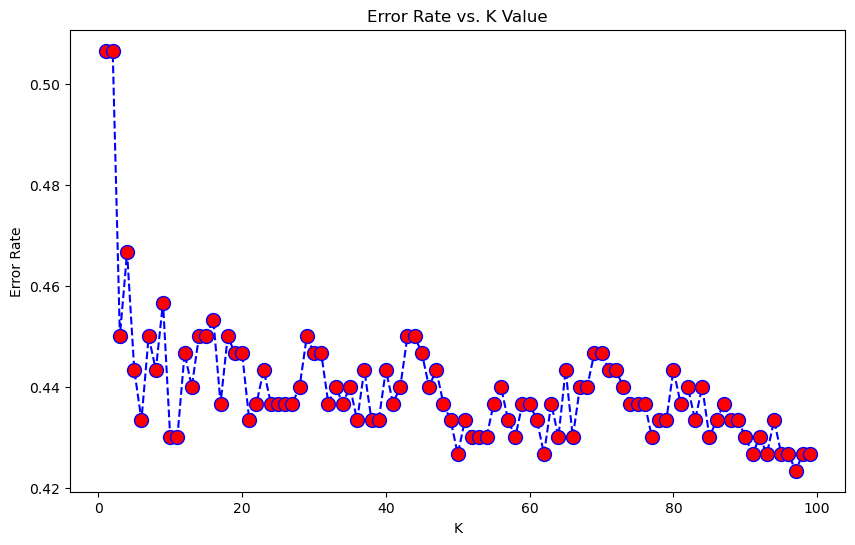

Optimal k value for minimum error rate: 97
Minimum Error Rate: 0.42333333333333334
1999
         證券代碼           簡稱         年月  市值(百萬元)  收盤價(元)_年      本益比     股價淨值比  \
400  19992330   台積電        1999-12-01  1281037     41.84  14.8369   2.33610   
401      2303  聯電          1999-12-01   743462     54.04  32.5542   3.40520   
402      2357  華碩          1999-12-01   379458    361.65  29.0016   9.81940   
403      1303  南亞          1999-12-01   317729     24.31   9.2083   1.06950   
404      2306  宏電          1999-12-01   291514     65.47  27.1660   3.39220   
..        ...          ...        ...      ...       ...      ...       ...   
595      5701   劍湖山        1999-12-01     5922     26.24  30.5116   1.39130   
596      1447  力鵬          1999-12-01     5878      8.99   9.2680   0.65573   
597      9908   大台北        1999-12-01     5815      6.76   7.9529   0.53693   
598      2537   聯上發        1999-12-01     5748    286.19 -80.3904  43.23110   
599      5401   第三波        1999-12-01     5

confusion_matrix:
[[102  28]
 [ 52  18]]
classification_report
              precision    recall  f1-score   support

          -1       0.66      0.78      0.72       130
           1       0.39      0.26      0.31        70

    accuracy                           0.60       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.57      0.60      0.58       200

新數據的預測準確率: 0.6
1.2579617130434784
563
358
21
89
128
491
635
255
539
90
503
90
583
單一年份最近鄰居中預測值為1的前5筆索引:
[163, 103, 183, 89, 90]
1563     嘉聯益       
1503     京元電       
1583    特力         
1489    神達         
1490    東鋼         
Name: 簡稱, dtype: object
1563      0.19755
1503     99.05730
1583     33.50750
1489    196.54870
1490    -16.90050
Name: Return, dtype: float64
1.6248211000000001
2005
          證券代碼           簡稱         年月  市值(百萬元)  收盤價(元)_年      本益比    股價淨值比  \
1600  20052330   台積電        2005-12-01  1545626     44.93  11.8549  2.49060   
1601      2317  鴻海          2005-12-01   736959     85.14

新數據的預測準確率: 0.555
2.0372014285714286
465
141
689
255
627
155
635
271
418
43
570
444
335
296
390
228
453
255
11
511
619
329
587
455
486
330
141
633
368
147
587
317
556
61
335
286
493
558
68
378
587
148
114
266
157
286
335
58
362
240
304
453
210
496
658
100
203
667
89
81
450
368
472
單一年份最近鄰居中預測值為1的前5筆索引:
[72, 141, 178, 89, 58]
2272    神達         
2341    南紡         
2378    台聚         
2289    欣興         
2258    彩晶         
Name: 簡稱, dtype: object
2272     42.9188
2341     95.9742
2378    104.5614
2289    248.0769
2258     94.1589
Name: Return, dtype: float64
2.1713804000000003
{1999: 0.6308301785714286, 2002: 1.4241270727272726, 2003: 1.2946306774193548, 2004: 1.2579617130434784, 2005: 1.5429955789473684, 2007: 0.5085250555555556, 2008: 2.0372014285714286}
年均化複利為:0.3341084739664663


{1999: 0.7540342, 2002: 1.3994996, 2003: 1.4404446, 2004: 1.6248211000000001, 2005: 1.5770994, 2007: 0.5414308, 2008: 2.1713804000000003}
年均化複利為:0.6541929058588251
ori sum2:4.579350341011775
test years have

In [99]:
max_ret=0
ans={}
list_ans=[]
#選擇特定欄位分析
from sklearn.preprocessing import StandardScaler
from itertools import islice
from itertools import combinations
from sklearn.model_selection import train_test_split

#selected_range = islice(year_combinations_dict.items(), 1) #4094是所有可用來訓練的年份組合
#selected_range = year_combinations_dict.items()
isopen=0
with open('KNN_train_test_result.txt', 'a') as file:
    file.truncate(0)
    # 選擇訓練集年分
    #train_years = [1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]#要寫int數字非字串(很重要)
    #train_years = [1999,2002,2004,2006,2007]
    #print(train_years)

    #print("---------------------")
    print(f'總共有test year:{len(test_years)}')
        
    # 根據年份選擇訓練集
    train_data = df[df['年月'].dt.year.isin(train_years)]
    print(f"Number of rows in train_data: {len(train_data)}")
    print(train_data)
        
    # 排除指定列，並標準化
    #columns_to_exclude = ['簡稱', '證券代碼', '年月', 'ReturnMean_year_Label', 'Return']
    #features_to_scale_train = train_data.drop(columns=columns_to_exclude)
    #features_to_scale_test = test_data.drop(columns=columns_to_exclude)
    
    list_ans=[]
    # 指定要選擇的欄位
    #selected_columns = ['股價淨值比', 'M淨值報酬率─稅後', '資產報酬率ROA', 'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M稅後淨利成長率']
    list_ans.append(selected_columns)
    
    # 檢查 train_data 是否包含任何資料
    if len(train_data) == 0:
        print("警告：train_data 中沒有任何資料。")
    else:
        # 檢查每個欄位是否都存在於 train_data
        missing_columns = [col for col in selected_columns if col not in train_data.columns]

        if not missing_columns:
            # 如果所有列都存在
            features_to_scale_train = train_data[selected_columns]

            scaler = StandardScaler()
            scaled_features_train = scaler.fit_transform(features_to_scale_train)

            # 轉換為 dataframe
            df_feat_train = pd.DataFrame(scaled_features_train, columns=features_to_scale_train.columns)
        else:
            print(f"警告：train_data 中缺少以下列： {missing_columns}")
        

    #---------------------------------------------------------------------------------------------
    # 分割訓練集和測試集
    X_train = df_feat_train
    y_train = train_data['ReturnMean_year_Label']

    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=101)

    #--------------------------------------------------------------------------------------------------
    error_rate = []
    from sklearn.neighbors import KNeighborsClassifier
    for i in range(1, 100):
        knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance', algorithm='brute')
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    # 將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5-6%之間震盪。
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 100), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
#--------------------------------------------------------------------------------------------------
    min_error = min(error_rate)
    optimal_k = error_rate.index(min_error) + 1  # Adding 1 because Python indexing starts from 0

    print(f"Optimal k value for minimum error rate: {optimal_k}")
    print(f"Minimum Error Rate: {min_error}")
    list_ans.append(optimal_k)
#--------------------------------------------------------------------------------------------------
    #使用KNN演算法
    clf=KNeighborsClassifier(n_neighbors=optimal_k,p=2,weights='distance',algorithm='brute')
    clf.fit(X_train,y_train)
#--------------------------------------------------------------------------------------------------
    predict_label1={}
    predict_k_pre5={}
#--------------------------------------------------------------------------------------------------

    for year in test_years:

        # 選擇特定年份的 test_data
        test_data = df_test[df_test['年月'].dt.year == year]
        print(year)
        
        print(test_data)
        print(f"Number of rows in test_data: {len(test_data)}")

        # 選擇指定的欄位
        features_to_scale_test = test_data[selected_columns]
        # 使用之前訓練好的標準化物件進行標準化
        scaled_features_test = scaler.transform(features_to_scale_test)
        # 將標準化後的特徵資料轉換為 DataFrame
        df_feat_test = pd.DataFrame(scaled_features_test, columns=features_to_scale_test.columns)


        # 使用已經訓練好的模型進行預測
        predictions_new = clf.predict(df_feat_test)

        #------------------------------
        #測試KNN演算法的好壞
        from sklearn.metrics import classification_report,confusion_matrix
        #將實際類別分為真正例（True Positive）、真負例（True Negative）、偽正例（False Positive）和偽負例（False Negative）
        print('confusion_matrix:')
        print(confusion_matrix(test_data['ReturnMean_year_Label'],predictions_new))

        #模型的精確度、召回率、F1分數和支持數等指標，用來評估模型對於每個類別的預測性能。
        print('classification_report')
        print(classification_report(test_data['ReturnMean_year_Label'],predictions_new))

        # 比較預測結果
        accuracy_new = clf.score(df_feat_test, test_data['ReturnMean_year_Label'])
        print(f'新數據的預測準確率: {accuracy_new}')
        #---------------------------------------
        #print(predictions_new)

        #predicted_positive_indices = (predictions_new == 1)

        # 獲取股票名稱
        #predicted_positive_stock_names = new.loc[predicted_positive_indices, '簡稱']

        # 設定檔案名稱
        #output_file_name = 'selected_stocks_1998.csv'

        # 匯出成 CSV 檔案
        #predicted_positive_stock_names.to_csv(output_file_name, index=True)

        # 預測要投資的股票名稱
        #print("選擇股票:")
        #print(predicted_positive_stock_names)


        # 選擇預測為1的股票
        selected_stocks = test_data[predictions_new == 1]

        # 計算return
        stock_returns = selected_stocks['Return']

        portfolio_returns = (stock_returns.mean()/100)+1

        print(portfolio_returns)
        predict_label1[year]=portfolio_returns

        # 使用 kneighbors 方法取得最近鄰居的索引和距離
        distances, indices = clf.kneighbors(df_feat_test, n_neighbors=optimal_k)

        # 合併所有測試樣本的最近鄰居索引
        all_indices = np.concatenate(indices)
        all_distances = np.concatenate(distances)

        # 將索引和距離組合成一個 2D 陣列，方便排序
        combined_data = np.column_stack((all_indices, all_distances))

        # 按照距離重新排序
        sorted_combined_data = combined_data[np.argsort(combined_data[:, 1])]

        # 選取最近鄰居中預測值為1的前5筆，且不重複
        selected_indices = set()
        i = 0
        while len(selected_indices) < stock_num and i < len(sorted_combined_data):
            index = int(sorted_combined_data[i, 0])
            print(index)
            #底下用iloc按位置選擇行(這也是為甚麼前面會需要減掉1000(某年起始的index)(才會對應到真正的相對位置區域)
            if(index>=200 and index<400):
                index=index-200
            elif(index>=400 and index<600):
                index=index-400
            elif(index>=600 and index<800):
                index=index-600
            elif(index>=800 and index<1000):
                index=index-800
            elif(index>=1000 and index<1200):
                index=index-1000
            elif(index>=1200 and index<1400):
                index=index-1200
            elif(index>=1400 and index<1600):
                index=index-1400
            elif(index>=1600 and index<1800):
                index=index-1600
            elif(index>=1800 and index<2000):
                index=index-1800
            elif(index>=2000 and index<2200):
                index=index-2000
            elif(index>=2200 and index<2400):
                index=index-2200
            elif(index>=2400 and index<2600):
                index=index-2400
            elif(index>=2600 and index<2800):
                index=index-2600
            elif(index>=2800 and index<3000):
                index=index-2800
            elif(index>=3000 and index<3200):
                index=index-3000
            prediction = predictions_new[index]
            if prediction == 1 and index not in selected_indices:
                selected_indices.add(index)
            i += 1

        # 將選取的索引轉換成列表
        selected_indices_list = list(selected_indices)

        # 打印最近鄰居中預測值為1的前5筆索引
        print("單一年份最近鄰居中預測值為1的前5筆索引:")
        print(selected_indices_list)
        select = test_data
        # 獲取股票名稱
        selects_stock = select.iloc[selected_indices_list]['簡稱']#這裡用iloc按位置選擇行(這也是為甚麼前面會需要減掉1000(代表從1000排)(才會對應到真正的相對位置區域)
        print(selects_stock)
        # 獲取股票return
        selects_ret = select.iloc[selected_indices_list]['Return']
        print(selects_ret)

        with open(f'selected_stock_KNN_train/attr.txt', 'a') as stockfile:
            if (isopen==0):
                stockfile.truncate(0)
                isopen=1
            stockfile.write(selects_stock.to_string())
            stockfile.write('\n')
            stockfile.write(selects_ret.to_string())
        # 計算return
        stock_returns = (selects_ret.mean() / 100)+1
        portfolio_returns = stock_returns
        print(portfolio_returns)
        predict_k_pre5[year] = portfolio_returns
        #print(stock_returns)
    sum1=1
    sum2=1
    print(predict_label1)
    for k in predict_label1.keys():
        if not (predict_label1[k]==0):
            sum1=predict_label1[k]*sum1
    print(f'年均化複利為:{sum1/int(len(test_years))}')
    print('\n')
    print(predict_k_pre5)
    for k in predict_k_pre5.keys():
        if not (predict_k_pre5[k]==0):
            sum2=predict_k_pre5[k]*sum2
    print(f'年均化複利為:{sum2/int(len(test_years))}')
    #list_ans.append(sum2/len(test_data)/200)
    print(f'ori sum2:{sum2}')
    print(f'test years have:{int(len(test_years))}')
    sum2=sum2/int(len(test_years))
    print(f'after sum2:{sum2}')
    list_ans.append(sum2)
    ans=list_ans
    file.write(f'{list_ans}\n\n')
    file.flush()  # 強制將緩衝區內容寫入檔案
    if(sum2>max_ret):
        max_ret=sum2
        with open('max.txt', 'w') as maxfile:
            maxfile.write(f'max:train_year:{train_years},test_year:{test_years}:{list_ans}\n\n')
            maxfile.flush()  # 強制將緩衝區內容寫入檔案